# Definition

In [1]:
def sq(x):
    return x*x

In [2]:
sq(2)

4

In [3]:
def cb(x):
    return x*x*x

In [4]:
cb(10)

1000

# Passing Function as an Argument

In [5]:
def double_it(x):
    return 2*x

def apply_transformation(f, arr):
    result = []
    for a in arr:
        v = f(a)
        result.append(v)
    return result


apply_transformation(double_it, [1,2,3])


[2, 4, 6]

In [6]:
apply_transformation(sq, [2,3,4])

[4, 9, 16]

In [7]:
apply_transformation(cb, [2,3,4])

[8, 27, 64]

# Differentiation

In [8]:
def diff(fn, x):
    delta = 0.001
    y = fn(x)
    x1 = x + delta
    y1 = fn(x1)
    return (y1 - y)/(x1 - x)

In [9]:
diff(sq, 2)

4.00100000000014

In [10]:
diff(cb, 2)

12.006001000000921

## Another way to Calculate differentiation

In [11]:
def diff2(fn, x):
    delta = 0.00001
    y_left = fn(x-delta)
    y_right = fn(x + delta)
    
    return (y_right - y_left)/(2*delta)

In [12]:
ans = diff2(sq, 2)
print(ans)
rounded = round(ans, 6)
print(rounded)

4.000000000026205
4.0


In [13]:
diff2(cb, 2)

12.00000000021184

In [14]:
### Now, generiled diff
import numpy as np

# The first

def diffp(fn, idx, *args):
    delta = 0.000001
   
    # call underlying function
    y = fn(*args)
   
    # Now, increase one input
    args = list(args)
    args[idx] += delta
  
    # Now, calculate the output
    y1 = fn(*args)
    return (y1 - y)/delta


## Simple Derivatives

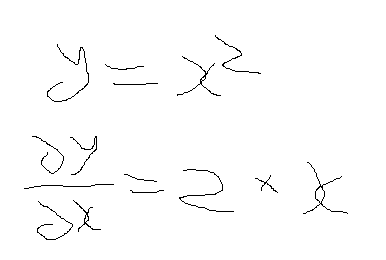 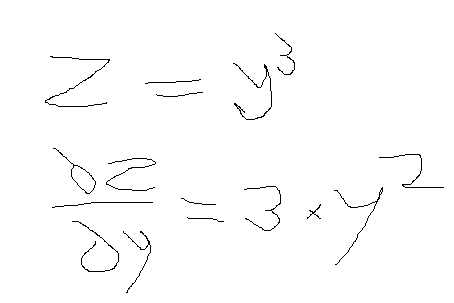

# Chain rule

In [15]:
def sqcb(x):
    y = sq(x)
    z = cb(y)
    return z

In [16]:
diff(sqcb, 2)

192.24016006001662

In [17]:
diff2(sqcb, 2)

192.00000001724501

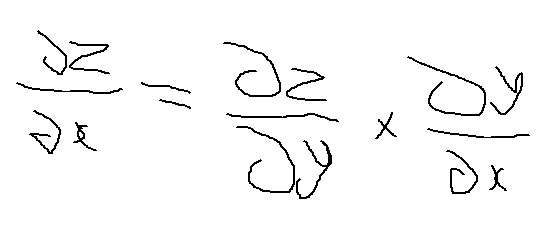

In [18]:
x = 2
d_sq = diff(sq, x)

In [19]:
y = sq(x)
d_cb = diff(cb, y)

In [20]:
d_sq * d_cb

192.09601600101374

# Gradient Descent

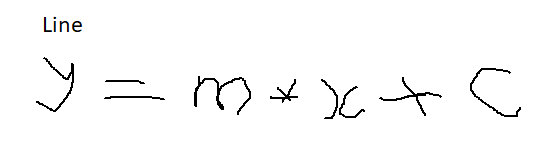

In [21]:
# Generate some data

import numpy as np

## 100 numbers
X = 2 * np.random.random((100,1))

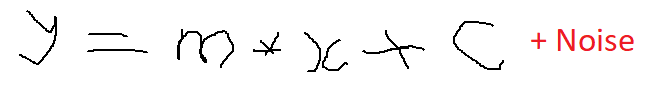

In [22]:
noise = .3*np.random.randn(100, 1)
m = 3
c = 4
y = m * X + c + noise

print(X[0:3])
y[0:3]

[[0.94544541]
 [0.30982305]
 [0.71053381]]


array([[5.89282542],
       [5.03064   ],
       [6.04967546]])

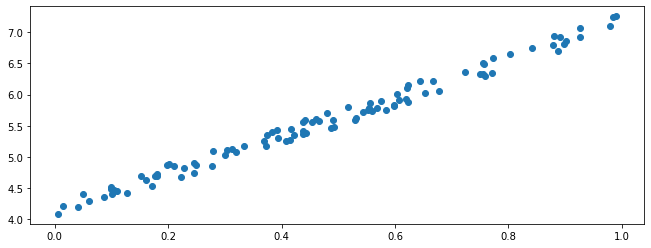

In [32]:
from matplotlib import pyplot as plt

plt.figure(figsize=(11,4))
plt.scatter(X,y)

In [24]:
def error(m,c,X,y):
    ypred= m*X + c
    err = ypred - y
    return np.sum(err*err)

In [25]:
error(3, 4, X, y)

7.47530885096782

# Backpropogation

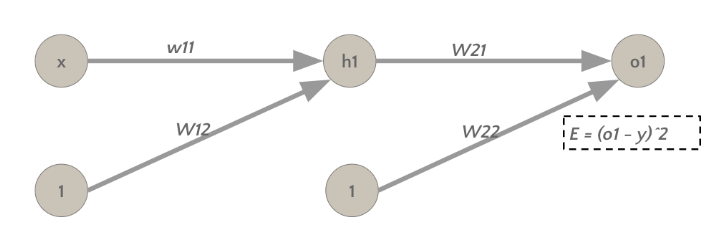

In [26]:
# Generate Data
import numpy as np

m=3 
c= 4
noise = .3* np.random.random((100, 1))
X= np.random.random((100,1))

y = m * X + c + noise


In [27]:
def neuron(w11, w12, x):
    return (w11*x + w12)

def forward_nn(w11, w12, w21, w22, x):
    h1 = neuron(w11, w12, x)
    o1 = neuron(w21, w22, h1)
    return o1

def sq_error(o1, y):
    e = o1 - y
    return e*e

def error_nn(w11, w12, w21, w22, x, y):
    o1 = forward_nn(w11, w12, w21, w22, x)
    return sq_error(o1, y)


In [28]:
w11 = 0.5
w12 = 0.5
w21 = 0.5
w22 = 0.5

eta = 0.001

for epoch in range(100):
    for i in range(len(X)):
        x = X[i]
        yy = y[i]
        
        dE_dw11 = diffp(error_nn, 0, w11, w12, w21, w22, x, yy)
        dE_dw12 = diffp(error_nn, 1, w11, w12, w21, w22, x, yy)
        dE_dw21 = diffp(error_nn, 2, w11, w12, w21, w22, x, yy)
        dE_dw22 = diffp(error_nn, 3, w11, w12, w21, w22, x, yy)
        
        w11 = w11 - eta * dE_dw11
        w12 = w12 - eta * dE_dw12
        
        w21 = w21 - eta * dE_dw21
        w22 = w22 - eta * dE_dw22

In [29]:
ycap = forward_nn(w11, w12, w21, w22, X)

<ipython-input-31-9b0276ffd6dc>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


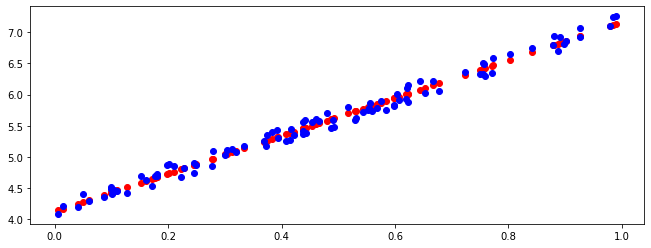

In [31]:
from matplotlib import  pyplot as plt

plt.figure(figsize=(11,4))
plt.subplot()
plt.scatter(X, ycap, color='r')

plt.subplot()
plt.scatter(X, y, color='b')